# Decision Tree Basics
* Decision Trees are quite simple in concept, but quite complicated in implementation 
* This lecture is going to cover the basic concepts, later lectures we will discuss the details
* at its core, you can think of a decision tree as just a bunch of nested if statements
* For example, lets look at our spam classifier again
* A decision tree may look like:

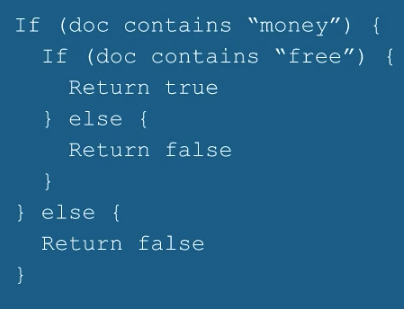

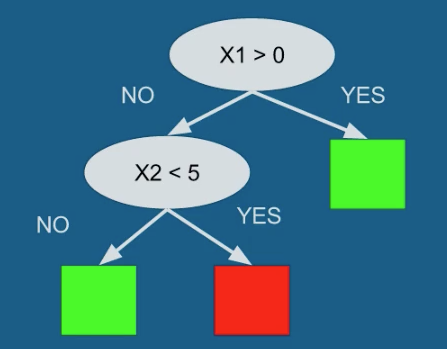

# What makes this machine learning?
* a bunch of if statements doesn't exactly sound very machine learning esque 
* What makes this ML is how we choose the conditions we check in the if statements 
* this is based on information theory 

# One key feature
* decision trees only look at one attribute or aspect at a time 
* in other words each condition checks only 1 column of the X matrix
* Usually we call these **input features**, but they are often called **attributes** when talking about decision trees
* For example, if we are using a persons height to help us make a decision, we may have a condition like:

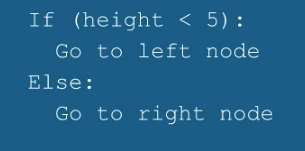

# Geometry 
* What does this tell us about the geometry of the problem?
* Well lets put height on the X1 axis and weight on the X2 axis. 

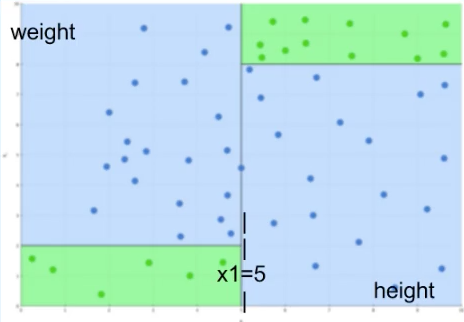 

* We see that if we split on X1=5, then everything to the left of it makes one decision, and everything to the right of it makes another decision 
* So while linear classifiers (discriminating line) can create boundaries that are at arbitrary angles to the axss, decision trees can only separate the data by lines that are orthogonal to the axis
* However, that does not just mean we are limited to one side being one thing, and the other side being another thing
* since we are working with trees now, we can have splits at each level, and thus the final decision boundary learned by a decision tree can be highly nonlinear!

# Recursiveness
* Another aspect of decision trees is that because we are using trees, the problem is inherently recursive
* A TreeNode will have children TreeNodes, and we will chose based on some criteria, which child to go to
* That child will then do the same thing, and chose one of its children to go to
* When we arrive at a leaf node, that is when we will make a prediction
* It then bubbles back up to the root node

# Pseudocode
* First lets pose some limitations on our implementation:
    1. we are only going to do binary classification
    2. each tree will only have 0 or 2 children (only 1 split per node)
    3. If node has children, it does not have prediction function, if node does not have children, it does have prediction function 
    
* lets assume we have an object called **`TreeNode`**, which contains the following:

In [1]:
class TreeNode(object): 
    def __init__(self): 
        self.condition
        self.left_node
        self.right_node
        self.left_prediction
        self.right_prediction

* if the node is not a leaf node, then **`left_node`** and **`right_node`** will also point to tree nodes
* if the node is a leaf node, then **`left_node`** and **`right_node`** will be null, but **`left_prediction`** and **`right_prediction`** will be set to the most likely values
* So the basic algorithm for predicting one sample is:

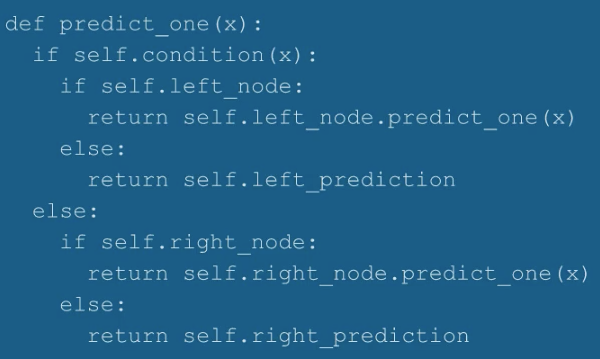

* so first we check the condition on x
* if it is true then we first check if we have a left node 
* if we do have a left node, then we predict one sample on the left node
* otherwise this is a leaf node we return the left prediction 
* we then go to where the condition is not true
* we check to see if we have a right node
* if we do have a right node, we should get the prediction from the right now 
* other wise this is a leaf node, so we should return the right side prediction 

# Notice...
* See how the function we just described above is for predicting one sample? 
* we need to make our predictions for one sample at a time, because the prediction may be true or false depending on which sample we are looking at 
* we will soon discuss how that function is found, and how we can use it to build the fit function which will also be recursive

---
# Information Entropy
* lets now look at the theory behind choosing the best splits in our decision tree
* At a high level we would like to make a split that maximizes the reduction in uncertainty 
* So for example, if there is a split we can make where we go from being 50% certain, to 100% certain, that is better going from 50% certain to 75% certain

# Information Entropy
* using information theory, we can quantify this concept
* we use what is called information entropy, and it is related to variance 
* recall that a wider variance means that we don't know much about the data we are going to get 
* A very small variance means we have more confidence about the specific values of the data 

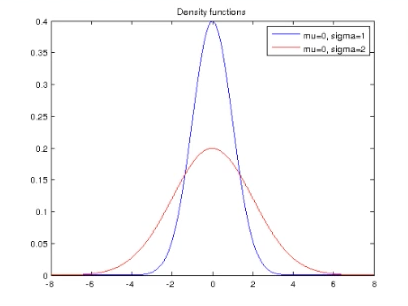

* Now the equation for information entropy is:

$$Entropy = E[-p(x)log_2\Big(p(x)\Big)]$$

* so we can see that it uses the probability distribution over x, just like variance 
* we can also see that it must be positive or 0, since p(x) must always be between 0 and 1, and the negative log of a number between 0 and 1, is greater than or equal to zero 
* Note that when dealing with entropy, we usually mean log base 2 implicitly 

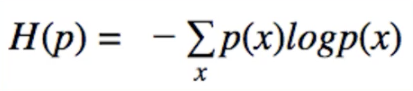

# Binary Random Variable
* Lets consider a binary variable specifically (we will call it X)
* Lets that that the probability that X = 1 is 
$$P(X=1) = p$$
* and that 
$$P(X=0) = 1 - p$$ 
* The equation for entropy thus becomes: 
$$H(p) = -plog(p) - (1-p)log(1-p)$$
* the question that we want to ask here is: What is the value of p that maximizes the entropy?
* to find this value we can take the derivative of h wrt p, set it equal to 0, and solve for p
$$\frac{dH}{dp}$$
* doing this yield the answer that 
$$p = 0.5$$
* if we were to plot H(X) vs P(x) we would see that H = 0 when p = 0 or 1
* and H is 1 when p = 0.5, which is the peak of H

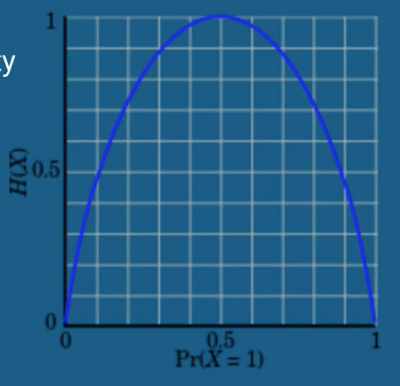

* Now we can start thinking about the meaning of entropy
* if the probability of a binary variable is 0.5, then there is **no possible way for you to make a good prediction about it**
* no matter what you predict, you will have a 50% chance of being wrong
* Lets consider a value other than 0.5, lets say p = 0.8
* if we wanted to predict the value of this random variable, we should always predict 1, because that gives us the best chance of being correct 
### Entropy is a measure of how much information we get from knowing (finding out) the value of a random variable 
* the way you can think about it is say:
* you start with 50/50 chance (half y =1, half y = 0). Hence, your entropy is 1
* if you then make a split where you still have half y =1 and half y =0, you entropy is still 1
* therefore, the entropy we started with 1, minus that we finished with 1, is 0, meaning a total gain of 0 entropy.
* AKA 0 information gain

# Example
* If we flip a coin with p = 0.8 probability of heads, and we get heads (1), we don't gain that much information, we were already 80% certain that we would flip heads
* However, if we flip a coin with p = 0.5 probability of heads, and we get heads, we gain the maximum amount of information we could have
* this is because prior to knowing, we were maximally clueless about the value we would get! 
* In general, the probability distribution that yields the maximum entropy is the uniform distribution  

# Intuition
* at this point you should be starting to think about how we may be able to use this...
* It would make sense that we try and create each node to maximize the amount of information gained

# Maximizing Information Gain 
* how will we use information entropy to help us choose the best attributes in our data? 
* We will NOT do ID3 (which is generally the most popular version to teach)

# ID3 overview
* We would like to find the attribute that best splits the data based on having the max information gain 
* once we make that split, we never use that attribute again
* All of the children nodes will have to chose maximum information gain, based on the rest of the attributes given the split of data
* The splits that occur in the ID3 algorithm do not have to be binary, however ours will be 
* For example, one attribute could be a dice roll, which can take on the values from 1 to 6. Hence the node could have 6 children 

# Our Version
* We are going to implement a different version, with regards to these two implementation details
* First, we will not require that an attribute can only be split once 
* from a geometric point of view, this would allow us to go from green to purple and back to green, then purple
* As an example, this would be useful for the donut problem!
* We can see that we used two green splits and two purple splits below
* This allows us to place the smaller circle in the center square

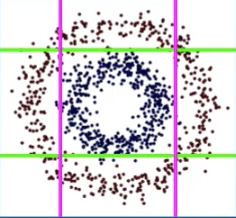

* Another reason we will be splitting the same attribute more than once is because each tree node is going to have 2 children 
* This will make things much easier when we looking at the MNIST data set, which we are treating as continuous data
* This allows us to simply specify a threshold at which to split left and right, rather than having a different child for all 256 discrete values

# What is information Gain?
* now that we know the best algorithm, choose the best attribute based on information gain, how do we actually calculate information gain
* For this, the main piece of information we are interested in is the labels 
* First consider the full data set. Suppose half of the data is from class 1, and half of the data is from class 0
    * 0, 0, 1, 1 
* In this case our entropy is 1
$$H(Y) = 1$$
* next, suppose we have an input attribute that perfectly splits the data 
    * E.g. if X < 0, Y = 0, if X > 0, Y = 1
* Well of course we should split on this attribute because it gives us a perfect classifier with 100% accuracy!
* Now the entropy for the left child is 0, and the entropy for the right child is 0 (i.e. the entropy for each subset of the data is 0)
* The toal information gain is:
$$Information \; Gain(Y|split\;on\;X) = H(Y) - 0.5*H(Y_{left}) - 0.5*H(Y_{right}) = 1 - 0.5*0 - 0.5*0 = 1 $$
* Our final information gain is 1, which is the maximum amount that we can get 
* The 0.5 means half the data went to the left, half went to the right 

# A more realistic example
* data is not always this nice! 
* more likely than not, after the split, data will still remain misclassified 
* Lets go through an example with two inputs, X1 and X2 
* here is our data:

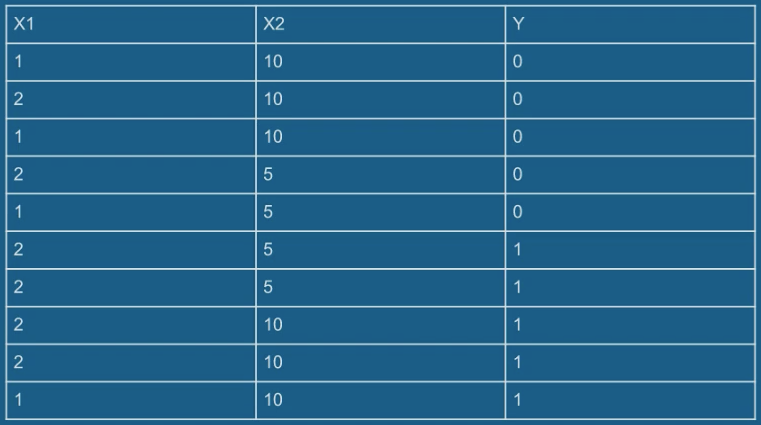

* first, we can clearly see here that the entropy of Y is 1, because we have a 50% chance of being 0, and a 50% chance of being 1
$$Entropy = H(Y) = 1$$
* now if split X1 between 1 and 2, we need to consider the subset of data where X1 is 1, and we need to consider the subset of data where X1 is 2 
### X1 = 1

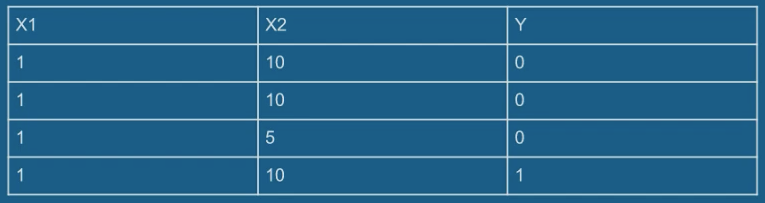

* We can see that the entropy of Y, for X1 = 1 is: 
$$H(Y|X_1=1) = -0.75log(0.75) - 0.25log(0.25) = 0.811$$

### X1 = 2 

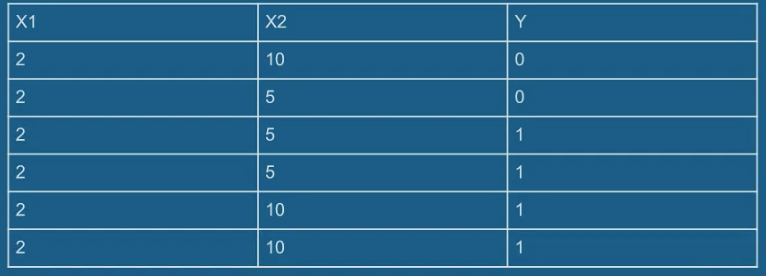

* We can see that the entropy of Y, for X1 = 2 is:
$$H(Y|X_1=2) = \frac{-1}{3}log(\frac{1}{3}) - \frac{2}{3}log(\frac{2}{3}) = 0.918$$

* So what does this mean?
* well if we split on X1, our information gain is:
$$IG = 1 - \frac{4}{10}(0.811) - \frac{6}{10}(0.918) = 0.1248$$
* Notice that each child nodes entropy's get multiplied by the proportion of data it received 
* This ensures that the information gain is always greater than 0

### Repeat for X2
* we now will repeat this for X2
* we need to consider the rows for which X2 is 5 and X2 is 10

### X2 = 5

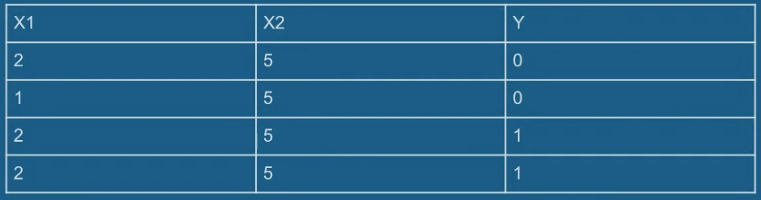

* So, the entropy of Y, for X2 = 5 is 1
$$H(Y|X_2=5) = 1$$

### X2 = 10

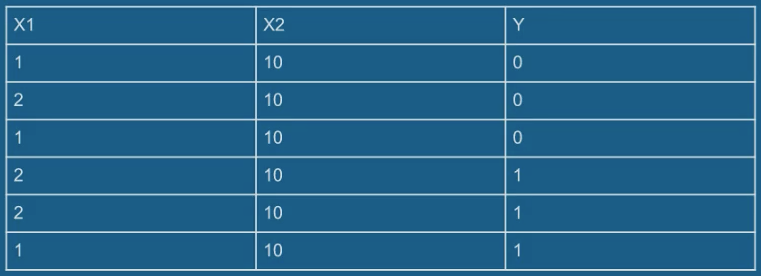

* So, the entropy of Y, for X2 = 10 is 1
$$H(Y|X_2=10) = 1$$

* So the total information gain by splitting on X2 is:
$$IG = 1 - \frac{4}{10}(1)-\frac{6}{10}(1) = 0$$

* Therefore, by splitting across the X2 column, we gain nothing 
* hence we should not split across this column
* Instead we should split on X1!

# Pseudocode

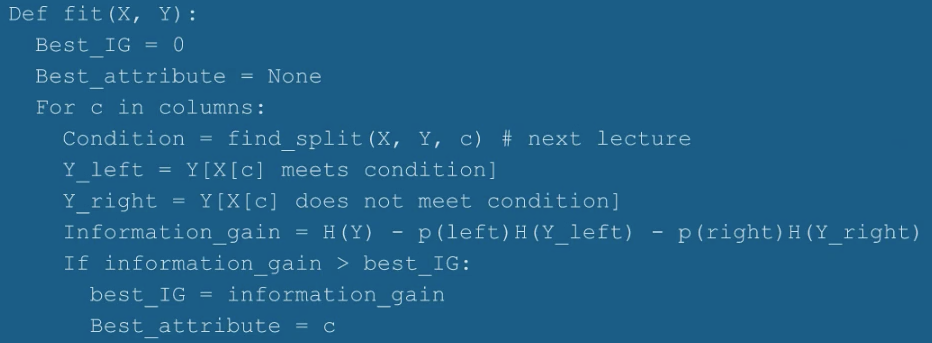

* We want to find the best information gain, and the best attribute that gives us the best information gain
* so we loop through all of the columns
    * split the data to find the condition 
    * find the Y which goes on the left node
    * Find the Y which goes on the right node
    * calculate the information gain
    * if this is better than our current best, we set this to our current best
    ### In our example above:
        * we looped through both columns (X1 and X2)
        * then in the case of X1 we split the data at X1 = 5
        * we grabbed the cases where X1 =5 and we placed them on the left node (calculate entropy)
        * we grabbed the cases where X1 != 5 and we placed them on the right node (calculate entropy)
        * we then calculated the information gain, using the entropy from the left and right node

* But there is still more work to do...

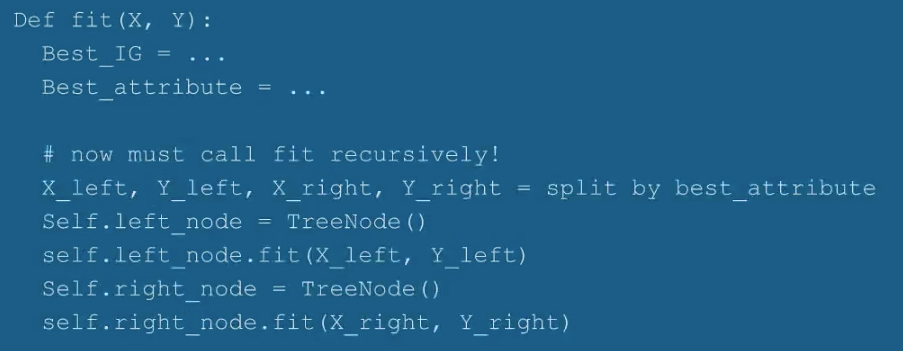

* once we have found the best attribute to split on, we split up the data into the left subtable and right subtable
* then we create a tree node for the left child and for the right child 
* And we fit those nodes to their corresponding data 

# Base cases
* one thing that is missing is that we did not check for base cases 
* these are needed when doing recursion 
* First base case: if information gain is 0, we gain nothing from splitting (nothing we can do to increase the accuracy), so we should just make this a leaf node! 
* if this is a leaf node then we should just take the most likely class (i.e. if there are more 1s than 0s in our subset of data, predict 1)

# More base cases
* there are still a few more base cases to consider 
* one thing that we want to avoid is overfitting 
* you can imagine that with a decision tree of arbitrary depth, we could easily get 100% training accuracy 
* but this may not lead to good generalization on the test data 
* one way to avoid this is to limit the maximum depth of the decision tree
* whenever we hit the maximum depth, we simply stop recursing, and make the current node a leaf node 
* therefore we must always tell a TreeNode what its current depth is, and what the max depth is

# Final base cases (trivial)
* if there is only one sample, there can only be 1 prediction, so we predict whatever the label for that sample is
* if we have more than one sample, but they are all the same class, then we should still predict whatever that label is 

---
# Chosing the best split 
* in the previous example, we made it very easy to chose the number at which to split
* X1 took on the values 1 and 2, so we simply needed to put all the 1s together in 1 table, and all the 2s together in another table
* It was the same case for X2
* However, what about the case of our MNIST data, where we are treating the values as continuous?
* with a continuous variable, there are an infinite number of possible splits
* Is that what we want to do, or can we find some rules, that lead to a smaller set of solutions?
* Yes!

# Rules 
* The first rule, is that we only need to consider the midpoint between any 2 sorted X's
* Why is that?
* splitting anywhere else between them will not change the entropy
* Consider the simplest case where we have the points 
* X: 0 1 2 3 
* with the labels
* Y: 1 0 1 0
* suppose we want to make a split between 1 and 2
* We choose 1.5, which is the midpoint
* the entropy on the left is 1 and the entropy on the right is 1 
* choosing any other split between 1 and 2, lets say 1.75, will not change the entropy, it will still be 1 and 1

# More rules 
* the next rule is that we only need to consider the boundaries between differing labels
* For example consider the situation below:

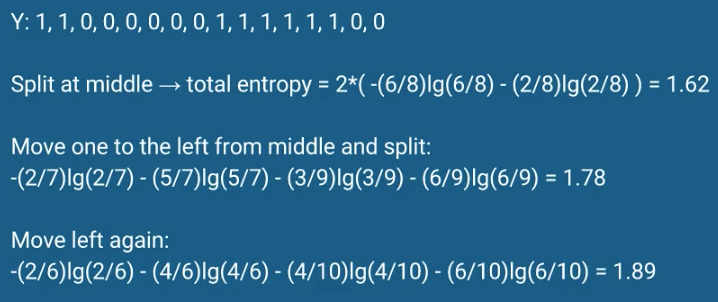

* suppose we make a split right down the middle, seen above
* that would give us 6/8 for the majority class on both sides, and thus a total entropy of 1.62
* Now if we move 1 over to the left, we have 2/7 and 5/7 on the left, and then 3/9 and 6/9 on the right
* that gives us a total entropy of 1.78
* This is a bigger entropy, which leads to less information gain if we split here!
* Lets move left again
* Now we have 2/6 and 4/6 on the left, with 4/10 and 6/10 on the right 
* That yields a total entropy of 1.89 
* we can see that the further left we go, the higher entropy we get, which leads to lower information gain
* since the left side, is the mere image of the right side, the same thing would happen if we moved right 
* Hence, we should only split where there are differing labels!

# Algorithm
* so the process for finding the best split on a given column works as follows
### 1) 
We need to sort all of the X's in that column in ascending order, and then sort the corresponding Y's in the same way
### 2) 
Then we need to find all of the boundary points, where Y changes from 1 class to another 
### 3)
Then we need to calculate the information gain given the split, at each of these boundary points. Which is just the midpoint between the two adjacent points 
### 4) 
We then take the split which gives us the maximum information gain

# Final Note
* note that this code is not optimized in any way 
* much slower than it needs to be 
* specifically any time we need to find the maximum information gain-whether that be for finding the best split, or finding the best column
* as we know, python for loops are very slow

---
# Decision Tree in Code
## Utility function

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

def get_data(limit=None):
    print("Reading in and transforming data...")
    df = pd.read_csv('data/train.csv')
    data = df.as_matrix()
    np.random.shuffle(data)
    X = data[:, 1:] / 255.0 # data is from 0..255
    Y = data[:, 0]
    if limit is not None:
        X, Y = X[:limit], Y[:limit]
    return X, Y

def get_xor():
    X = np.zeros((200, 2))
    X[:50] = np.random.random((50, 2)) / 2 + 0.5 # (0.5-1, 0.5-1)
    X[50:100] = np.random.random((50, 2)) / 2 # (0-0.5, 0-0.5)
    X[100:150] = np.random.random((50, 2)) / 2 + np.array([[0, 0.5]]) # (0-0.5, 0.5-1)
    X[150:] = np.random.random((50, 2)) / 2 + np.array([[0.5, 0]]) # (0.5-1, 0-0.5)
    Y = np.array([0]*100 + [1]*100)
    return X, Y

def get_donut():
    N = 200
    R_inner = 5
    R_outer = 10

    # distance from origin is radius + random normal
    # angle theta is uniformly distributed between (0, 2pi)
    R1 = np.random.randn(N//2) + R_inner
    theta = 2*np.pi*np.random.random(N//2)
    X_inner = np.concatenate([[R1 * np.cos(theta)], [R1 * np.sin(theta)]]).T

    R2 = np.random.randn(N//2) + R_outer
    theta = 2*np.pi*np.random.random(N//2)
    X_outer = np.concatenate([[R2 * np.cos(theta)], [R2 * np.sin(theta)]]).T

    X = np.concatenate([ X_inner, X_outer ])
    Y = np.array([0]*(N//2) + [1]*(N//2))
    return X, Y

### Entropy Function
* remember, entropy is a measure of how much information we get from knowing (finding out) the value of a random variable
* using binary situation, i.e. y can only be class 1 or 0

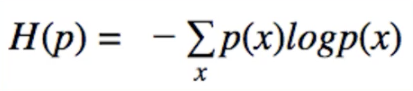

In [2]:
def entropy(y): 
    N = len(y)
    s1 = (y==1).sum()        # find all data where y = 1. The data where y = 0 is N - s1 (allows us to take sum once)
    if 0 == s1 or N == s1:   # shortcut if number of 1s is 0 or N (meaning we have all 0 ones or all 1s)
        return 0             # hence, no information can be gained, so entropy is 0
    
    p1 = float(s1) / N       # getting p1 (number of times class y = 1 occurs, divided by total examples)
    p0 = 1 - p1              # getting p0 (number of times class y = 0 occurs, divided by total examples, or 1-p1)
    
    return -p0*np.log2(p0) - p1*np.log2(p1)         # return result of entropy equation        

### Tree Node Class


In [3]:
class TreeNode: 
    def __init__(self, depth=0, max_depth=None):             
        self.depth = depth
        self.max_depth = max_depth
        
    # ------------------    ------------------    Fitting process    ------------------    ------------------    #
    
    def fit(self, X, Y):                                    # fit function, takes in X and Y
        if len(Y) == 1 or len(set(Y)) == 1:                 # the length of Y is 1, or there is only 1 label in Y
            self.col = None                                # base case, nothing we can do, we can just predict 
            self.split = None                               # this label
            self.left = None 
            self.right = None
            self.prediction = Y[0]
            
        else:                                              # if we don't hit base case, we get number of dimensions 
            D = X.shape[1]                                 # in X (this case 784), so range is (0,784)
            cols = range(D)                                # these are the columns that we want to loop through
            
            max_ig = 0                                     # set max information gain to 0
            best_col = None 
            best_split = None 
            for col in cols:                                # now we are looking for the best column 
                ig, split = self.find_split(X, Y, col)      # function find split, finds best split given a certain
                if ig > max_ig:                             # if this ig is greater than max ig so far, we replace
                    max_ig = ig
                    best_col = col
                    best_split = split
            
            if max_ig == 0:                                 # once loop is done, we check if max_ig is 0, base case
                self.col = None                            # another base case, no more split we can do               
                self.split = None                               
                self.left = None 
                self.right = None
                self.prediction = np.round(Y.mean())
            
            else:                                           # otherwise we keep track of best column and best split
                self.col = best_col
                self.split = best_split
                
                if self.depth == self.max_depth:             # check for last base case, if at maxdepth, will split no more
                    self.left = None
                    self.right = None
                    self.prediction = [                                             # takes the majority class, 
                        np.round(Y[X[:, best_col] < self.split].mean()),            # after splitting the data 
                        np.round(Y[X[:, best_col] >= self.split].mean()), 
                    ]
                    
                else:                                          # else not in a base case, and should do recursion
                    left_idx = (X[:, best_col] < best_split)     # left index is all points for which x @ this attribute
                    Xleft = X[left_idx]                        # less than the split
                    Yleft = Y[left_idx]
                    self.left = TreeNode(self.depth + 1, self.max_depth)    # create new tree node on left side 
                    self.left.fit(Xleft, Yleft)
                    
                    right_idx = (X[:, best_col] >= best_split)                # create new tree node on right side
                    Xright = X[right_idx]                        
                    Yright = Y[right_idx]
                    self.right = TreeNode(self.depth + 1, self.max_depth)
                    self.right.fit(Xright, Yright)                          # fit is calling itself RECURSIVELY
    
    
                    
    def find_split(self, X, Y, col):
        x_values = X[:, col]                                 # want all X values (all rows of X for this column)
        sort_idx = np.argsort(x_values)                      # want the index's that sort the x values 
        x_values = x_values[sort_idx]                               # set X values to sorted x values
        y_values = Y[sort_idx]                               # set Y values to be sorted in exact same way 
        
        boundaries = np.nonzero(y_values[:-1] != y_values[1:])[0]   # where labels change from one label to another label 
        best_split = None 
        max_ig = 0                                                  # this gives us all the boundaries (their index's)
        for i in boundaries:                                        # now loop through all of the boundaries
            split = (x_values[i] + x_values[i + 1]) / 2             # find split
            ig = self.information_gain(x_values, y_values, split)   # find information gain given split
            if ig > max_ig:
                max_ig = ig
                best_split = split
        return max_ig, best_split
    
    
    def information_gain(self, x, y, split):
        y0 = y[x < split]                           # calculate y0, any y where x is less than the split threshold
        y1 = y[x >= split]                          # calculate y1, any y where x is greater than the split threshold
        N = len(y)                                  # need proportions, so we want length of y0
        y0len = len(y0)
        if y0len == 0 or y0len == N:                # if y0 has len 0 or N, ig is 0
            return 0
        p0 = float(len(y0)) / N                     # calculate proportions
        p1 = 1 - p0
        return entropy(y) - p0*entropy(y0) - p1*entropy(y1)           # finally return information gain
    
    # -----------------  ------------------   Prediction process  ------------------  ------------------    #
    
    def predict_one(self, x):                                         # has to check for base cases
        if self.col is not None and self.split is not None:           # means we actually made a split
            feature = x[self.col]                                     # get feature
            if feature < self.split:                                  # if less than split, goes to left side
                if self.left:                                         # if we have left child
                    p = self.left.predict_one(x)                      # recursively call predict_one
                else:                                                 # else return this leaf nodes prediction
                    p = self.prediction[0]
            else:                                                     # if we don't go to left, we go to right
                if self.right:
                    p = self.right.predict_one(x)
                else: 
                    p = self.prediction[1]
                    
        else:                                                          # if we only have 1 prediction for leaf node
            p = self.prediction 
            
        return p

    
    def predict(self, X):                                       # calls predict_one for each individual X
        N = len(X)
        P = np.zeros(N)
        for i in range(N):
            P[i] = self.predict_one(X[i])
        return P
    
    
    
# ------------------    ------------------    Wrapper Class    ------------------    ------------------    #
        
class DecisionTree:                                                 # this is somewhat redundant
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        
    def fit(self, X, Y):
        self.root = TreeNode(max_depth=self.max_depth)               # creates root node
        self.root.fit(X, Y)                                          # calls fit on root node
        
    def predict(self, X): 
        return self.root.predict(X)                                  # predict just calls root 
    
    def score(self, X, Y):                                           # same score function as always 
        P = self.predict(X)
        return np.mean(P == Y)

In [4]:
if __name__ == '__main__':
    X, Y = get_data()
    
    idx = np.logical_or(Y == 0, Y == 1)             # this is because we are doing binary classification
    X = X[idx]
    Y = Y[idx]
    
    
    Ntrain = int(len(Y) / 2) 
    Xtrain, Ytrain = X[:Ntrain], Y[:Ntrain]
    Xtest, Ytest = X[Ntrain:], Y[Ntrain:]
    
    model = DecisionTree()
    # model = DecisionTree(max_depth=7)
    t0 = datetime.now()
    model.fit(Xtrain, Ytrain)
    print("Training time:", (datetime.now() - t0))

    t0 = datetime.now()
    print("Train accuracy:", model.score(Xtrain, Ytrain))
    print("Time to compute train accuracy:", (datetime.now() - t0))

    t0 = datetime.now()
    print("Test accuracy:", model.score(Xtest, Ytest))
    print("Time to compute test accuracy:", (datetime.now() - t0))
    

Reading in and transforming data...
Training time: 0:00:26.994776
Train accuracy: 1.0
Time to compute train accuracy: 0:00:00.011129
Test accuracy: 0.9945553539019963
Time to compute test accuracy: 0:00:00.010629


---
# Decision Tree algorithm step by step

### Load Data
The first thing that happens is the main function is called, and we load in our X and Y data.

In [80]:
X, Y = get_data()

Reading in and transforming data...


### Binary classification, data setup 
This will return idx as an array of 42000 true or false values (true if the number was 0 or 1)

In [81]:
idx = np.logical_or(Y == 0, Y == 1)
idx

array([False,  True, False, ..., False, False,  True])

Now we grab the X and Y values where the idx is true- ie grabbing all of the X and Y examples for which Y = 0 or 1. We can call set(Y) to see that there are only the values 0 and 1 in Y once this is complete. This allows us to perform binary classification.

In [82]:
X = X[idx]

In [83]:
Y = Y[idx]
set(Y)

{0, 1}

### Instantiate model
At this point the training data has been created and a model would normally be instantiated. However, this walk through is designed to show the mechanical steps of the algorithm, so we are going to move to the next part, the fit function.

### Fit Function called
Lets really take a moment to think- what is the goal when the fit function is called and we are trying to fit our decision tree model? 
### Fit function goal: 
**We are trying to find the best attribute (column/input feature) to split on. The best attribute is the one that gives us the greatest information gain**.
### Fit function algorithm
How do we find the input feature to split on, that gives us the greatest information gain?
**We find the condition to split on, then split our data based on that condition, and calculate the resulting entropy for each of the two subtables. From there we can calculate the information gain due to this process.**

### Best Split Function
We just mentioned above that we find the condition to split on- How do we actually find the best split? 
So say that we are working with input feature X1, and it has the following data [1,2,3,4,4,5,6,7,7]. How do we determine at which point to make the condition threshold to split the data into two sets? 
**First we want to sort our data in X1, and sort the Y data in the same fashion (matching with the X1). Then, wherever the data changes from one class to another, we mark as a boundary point. Then we calculate the information gain, given the split, at each of the boundary points (this is just the threshold between two adjacent points. We take that which gives us the maximum information gain. **

Here is a basic example. Say we have the following data:
X1 = [5,1,3,6,7]
Y = [0,1,1,0,0]
1. Sort X1 data and have y follow
X1 = [1,3,5,6,7]
Y = [1,1,0,0,0]
2. Wherever data changes from one class to another, mark as boundary point.
Boundary point = 4 (the value between 3 and 5, where the label changes from 1 to 0)
3. Find information gain
Entropy given X1 < 4 = -1*log(1)-0*log(0) = 0
Entropy given X1 >= 4 = -1*log(1)-0log(0) = 0
Information gain = Original entropy - 0 - 0 

This is the maximum information gain that we could have achieved! In a large data set, this would then be repeated for any point at which the label changed from one class to another, and then the same process performed for **every** input attribute! 

### In code
Lets now look at this process in code. The base cases that were considered above will be ignored, so we can focus more on how the bulk of the algorithm functions mechanically. 

Start by getting the number of columns in the data set (attributes/ input features)

In [84]:
D = X.shape[1]
columns = range(D)
columns

range(0, 784)

Now lets set our maximum information gain to 0, and our best column and split to none. 

In [85]:
max_ig = 0
best_col = 0
best_split = 0 

Now we can loop through **all** of our input features/attributes, in order to find the best one to split on! Normally we would have placed the logic to find the best split into a function and call it, but I am going tp lace it all here so the whole process can be seen easily.

In [86]:
for col in columns:
    #---- logic starts here to find the best split- this will be done for EVERY column!-----
    
    # ------------ 1 sort x values and the corresponding y in ascending order based on x -------------
    x_values = X[:, col]                 # grab the x attribute values for the column
    sort_idx = np.argsort(x_values)      # get index's that sort the x attributes in ascending order
    x_values = x_values[sort_idx]        # now have the x values sorted in ascending order
    y_values = Y[sort_idx]               # sort each x's corresponding y in the same way
    
    # ------------ 2 wherever data changes from 1 class label to another, mark as a boundary point --------
    boundaries = y_values[:-1] != y_values[1:]  # true/false array where the class changes from 0 to 1, 1 to 0
    boundaries = np.nonzero(boundaries)[0]      # index's of where label changes 
    
    # ------------ 3 find information gain based on each split boundaries from step 2 -----------------
    for i in boundaries: 
        split = (x_values[i] + x_values[i + 1]) / 2    # calculate mid point at which to make split threshold 
        
        # -------- 4 find the information gain based on the split ---------------------------------------
        ig = self.information_gain(x_values, y_values, split)   # find information gain given split
         # once we have the split threshold, we separate our data based on the threshold
         # we then determine the proportions so that we can calculate the amount of entropy gained for each 
         # subtable
         # We then determine the entropy for each subtable, subtract them both from the original entropy
         # and return the information gain 
         # if this is great than the max information gain so far, we replace that max information gain 
        
        
        


# Fit Function 
* this operates on a single TreeNode
* we loop through every column 
* for each column we use the try and find the best split
     * in order to do that we sort the input column ascendingly, find the boundaries where the label changes, and then find which boundary gave the maximum information gain
     * we return that information gain, as well as the split threshold 
* After looping through all of the columns and repeating this process, we will have found the column, and its specific threshold that gives us the maximum information gain! 
* this column is set as the column/attribute for this specific tree node
* at this point we check for base cases, if we don't hit any then we recursively call fit!
* create two new tree nodes, left and right
* left gets all of the data for which X attribute was less than the threshold
* right gets all of th data for which X attribute greater than the threshold 
* call fit on both left and right node, passing in the correct data for each
* this continues until base cases are hit

--- 
# Decision Tree Overview
The first question that may come to mind after you first hear initially about what decision tree is, is how exactly are a bunch of if statements utilized with out hard coding? In other words how does the image below get translated into code, in a **dynamic** way that can change based on different data? 

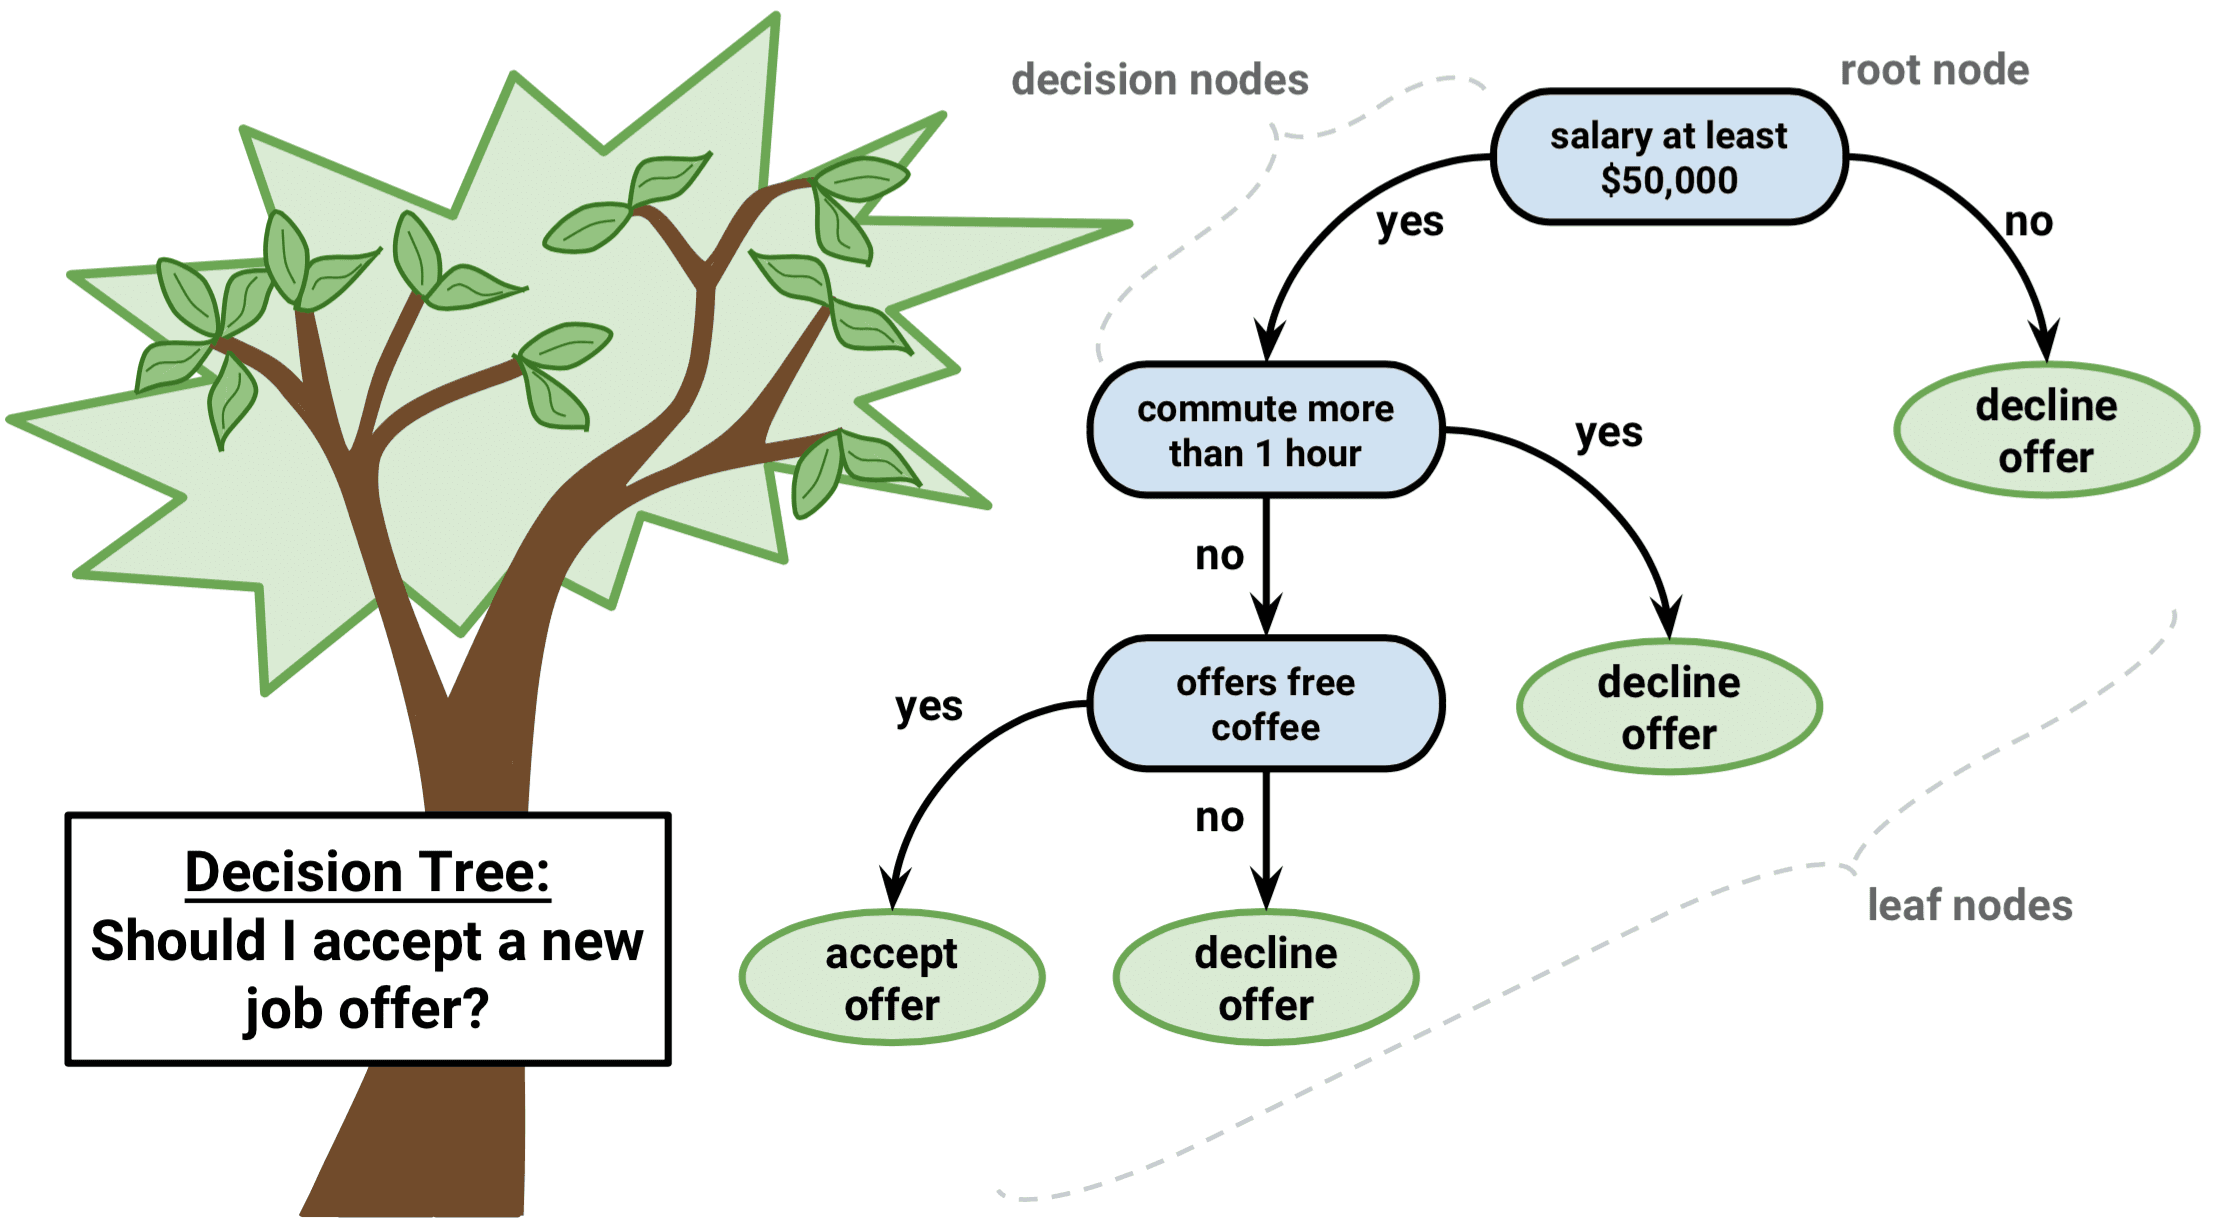

Well you are going to need to be familiar with two computer science topics in order for this click. The first is a **Tree** data structure, and the second is **recursion**, the act of a function which will call itself. 

## Tree Data Structure - Theory
I highly recommend checking out this link if it is still available https://medium.com/the-renaissance-developer/learning-tree-data-structure-27c6bb363051, but I will go through an highlight some of the key points below.

When transitioning from arrays, hash tables, linked lists, etc, to trees or graphs, it can be very confusing. The main reason for this is that the prior data structures store information in a linear way, while Trees store data in a non-linear fashion-they organize data in a **hierarchical way**. 

Now lets dive into some technical definitions. A **`Tree`** is a collection of entities called **`nodes`** connected by **`edges`**. Each node contains a **`value`** or **`data`** and it can also have a **`child node`**. 

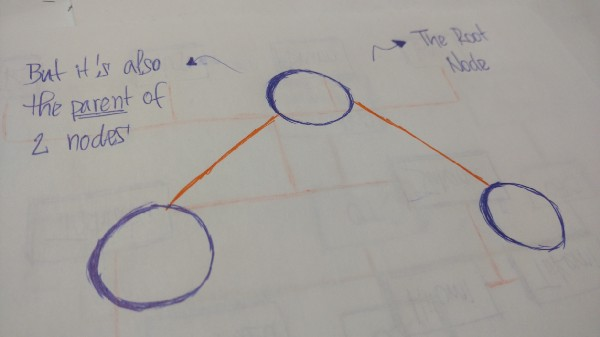

The **`first node`** of the tree is called the **`root`**. If this root node is connected by another node, the root is a **`parent node`** and the connected node is a **`child`**. 

Tree nodes are all connected by links called **`edges`**. This is a very important part of a tree because it is how we manage relationships between nodes. 

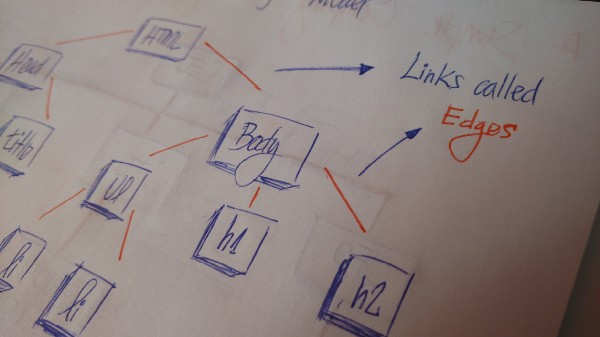

**`Leaf nodes`** are the last nodes from the tree. In other words, nodes without children.

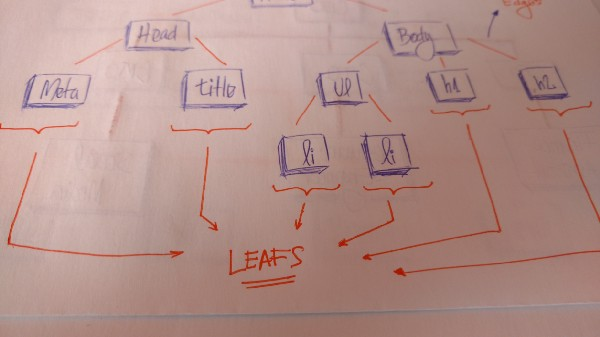

We also need to talk about **`height`** and **`depth`**. The height of a tree is the length of the longest path to a leaf. The depth of a node is the length of the path to its root. 

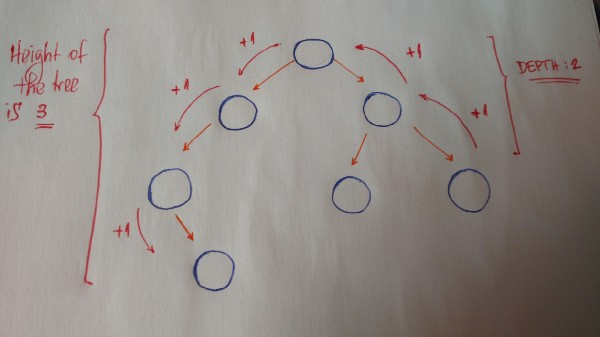

### Terminology Summary:
* **`Root`**: the topmost node of the tree
* **`Edge`**: the link between 2 nodes
* **`Child`**: a node that has a parent node
* **`Parent`**: a node that has an edge to a child node
* **`Leaf`**: a node that does not have a child node in the tree
* **`Height`**: The height of a tree is the length of the longest path to a leaf.
* **`Depth`**: The depth of a node is the length of the path to its root.

## Tree Data Structure - Code/Implementation
Now that the theory is covered, it still may seem a little abstract as to how we will implement this tree data structure. Lets take a look below, by starting to initialize our Tree class.

In [1]:
class BinaryTree:
    def __init__(self, value):
        self.value = value
        self.left_child = None
        self.right_child = None

Excellent, we can see abouve that when we instantiate a new tree object (which will be a node), we pass the value as a parameter. We then can see that the left and right child are set to none. This is because when we create the root node, it has no children. In order to change that we need to have an insert method on the left and right child. 

In [3]:
def insert_left(self, value):
    if self.left_child == None:
        self.left_child = BinaryTree(value)
    else:
        new_node = BinaryTree(value)
        new_node.left_child = self.left_child
        self.left_child = new_node
        
        
def insert_right(self, value):
    if self.right_child == None:
        self.right_child = BinaryTree(value)
    else:
        new_node = BinaryTree(value)
        new_node.right_child = self.right_child
        self.right_child = new_node

Okay with that taken care of, it is pretty straightforward to see how a tree data stucture would be built at this point! 

## Tree Implementation 
Now that it is clear how to use a tree data structure in general, its lets get back to the problem at hand. How will we be able to take a data set of say 1000 labeled training examples, and use what essentially is a series of if statements in order to build an accurate classifier. And more importantly, how will we be able to do this dynamically? Well to determine that we need to look at the main steps that go into building a decision tree.

1. Fit/Train the model
    * Best feature to split on 
    * Best split/threshold for that feature
    * The above is accomplished with the idea of maximizing **information gain**, or the change in **entropy**.
2. Predict

## Walkthrough
So lets actually walk through the implementation, using the following example:
* we are trying to predict if it is going to snow today or not
* we have 1000 labeled training examples
* each of which has 10 input features/attributes (forecast temperature, temperature yesterday, forecast humidity, month, city, etc)
* and the label is binary, i.e. class is either 0 or 1 (yes it snows, no it does not)
 
## Step 1 - Determine best feature to split on
We start with just 1000 labeled training examples, knowing that the goal of this decision tree method is to separate our data slowly with a series of if statements, that will then be useful in predicting the class of an unlabeled input. Well, intuitively, we can think of this similar to the game of 20 questions. We start off with a very large **input space**. In this case the input space is 365 days (i.e. it can be any day of the year), and the entire range of different weather scenarios for all different locations on earth). We are trying to find the input features that is the most helpful to split on. 

For instance, we may have an input feature air quality. Say that for instance, the air quality takes on a range of 0 or 1 (unacceptable or acceptable). Now lets say that for our 1000 original examples there are 500 for which the label is 1 (it snowed) and 500 for which the label was 0 (it did not snow). Well lets say we split the data based on air quality-in other words we will make 2 new tables- one where every example has an air quality of 1, and one where every example has an air quality of 0. What if in each of the 2 new subtables, the labels were still split 50/50. Aka, say that there were 500 days of 0 air quality, and 500 days of 1 air quality. We then have 2 subtables of 500 examples each, if they both now have 250 examples where it snowed, and 250 examples where it did not snow, then we are **no closer to making a useful prediction!**. We still would have a 50% of being right, and 50% of being wrong. 

**However**, what if we decided to split on **forecast temperature**? Now lets say that we split on a forecast temperature of 36 degrees. So now we have a subtable where are examples have a forecast temperature of under 36 degrees, and another subtable where all examples are above 36 degrees. Recall that our original table had 500 snow examples, and 500 no snow. Now, when we look at the labels of our two subtables, we see that for the table with examples where temperature was entirely above 36 degrees there are only 10 examples where it snowed, and 490 where it did not. And for our subtable with examples all under 36 degrees, we see that there are 250 examples of snow, and 250 without, we can see that this was a **great** improvement! We managed to filter out nearly 500 examples! 

Now, the question must then arise, how can this process be expressed mathematically, in a way that can be optimized, and written in code to be understood by a computer. And that is where **information entropy** and **information gain** come in. 

### Information Entropy 
In a nutshell, entropy is a measure of how much information we get from knowing the value of a random variable. The equation looks like:

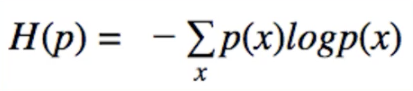

Essentially, we are going to want to our split to lead us to **less entropy**! If we started with an entropy of 1, and then our split leads us to an entropy of 0, that is the best possible split there is. The goal over all is to find the split that allows to us to **maximize our information gain**. 

Information gain is defined as the: initial entropy - entropy after the split. So by maximizing information gain, we are minimizing the entropy after the split. 

* the way you can think about it is say:
* you start with 50/50 chance (half y =1, half y = 0). Hence, your entropy is 1
* if you then make a split where you still have half y =1 and half y =0, you entropy is still 1
* therefore, the entropy we started with 1, minus that we finished with 1, is 0, meaning a total gain of 0 entropy.
* AKA 0 information gain
* However, if we split and have all y = 1, and no y = 0, then we have found a perfect classifier, and our new entropy would be 0, with an information gain of 1!

### Back to implementation - Fitting the model
So now that we have a good idea how information gain and entropy can be utilized in this splitting process, we can get back to implementation. So now say we start at the root node, meaning we have 1000 examples at this point. We will begin by looping through each input feature/attribute (column) in order to see which is the best to split on. There is something we have no discussed yet though. For each attribute, what is the process for determining the split threshold?? In other words, for the example above, I just chose 36 degrees since I had an understanding of temperature and freezing point, however a computer would not. What algorithm should be followed to help it determine the best split for each attribute. 

Here is what we will do: As we loop through each individual column, we will sort the attribute data in ascending order, with the corresponding Y's staying matched with the sorted X. We then find the boundary points where Y changes from 0 to 1. Wherever those occurs, we will will find the X midpoint boundary, and have that be a boundary point. Then we will loop through the boundary points and determine that which yields the largest information gain. As a small example say we have the following data: 
* X1 = [5,1,3,6,7] Y = [0,1,1,0,0]. 
* Sort X1 data and have y follow X1 = [1,3,5,6,7] Y = [1,1,0,0,0]. 
* Wherever data changes from one class to another, mark as boundary point. Boundary point = 4 (the value between 3 and 5, where the label changes from 1 to 0)
* Find information gain Entropy given X1 < 4 = -1log(1)-0log(0) = 0 Entropy given X1 >= 4 = -1*log(1)-0log(0) = 0 Information gain = Original entropy - 0 - 0

This is the maximum information gain that we could have achieved! In our 1000 example data set, this would then be repeated for any point at which the label changed from one class to another, and then the same process performed for every input attribute!

Once this each input attribute found the best split at which it yielded the best information gain, the information gain of each attribute would be compared with the others, and the attribute that yielded the highest information gain would be the one for which the root node split was created! 

After the attribute and its best split have been determined, the node object will have its column set, as well as the split threshold. Several base cases will be checked, and if none have been hit then the node will have its left and right children nodes set. This is done by take the data from the 2 subtables (based on the nodes split threshold) and passing the left node the data from one subtable, and the right node the data from the other subtable. The fit method is then called recursively on each of those nodes. 

### Base cases
Because fit is being called recursively when building this tree, we need to check for base cases to prevent going into an infinite loop. Here are the base cases to check for:
1. After the maximum information gain has been determined, we need to check if it is equal to 0. If it is, then no information was gained and we gain nothing from doing that split, so we will just make this a leaf node! If it is a leaf node then we just make a prediction based on the most likely class (i.e. if there are more ones in our subset of data, predict class 1)
2. Limit depth of decision tree

### Implementation - Making Predictions
Once we have a fully trained model, the next step is making predictions. It should be noted that we are going to have to make predictions 1 by 1, since the conditions will be met differently for each example. 

The prediction process works by looping through each example we want to predict and doing the following:
1. On the root tree node object of our model, we we get the feature that we are going to split on, and then get that feature value for our input example
2. We then check to see if the feature value for our input example is less than or greater than the threshold split value
3. If is is less than, we check to see if the tree node has a left child node. If it does, we call predict on the left child, passing in the input example. If it does not, we grab the prediction value at that point. 
4. If it is greater than, we repeat the process on the right side. 